## 数据挖掘-homework2-22210980041-胡一航


1. 请完成数据读入与数据概览
2. 对薪资(salary)做对数变换，并记为新变量(lnsalary)
3. 绘制总体数据中对数薪资(lnsalary)的直方图，观察薪资的大致分布，并进行简要解读
4. 绘制不同公司属性(nature)下，对数薪资(lnsalary)箱线图，并进行简要解读
5. 用所有的数据，将对数薪资(lnsalary)作为因变量，其余变量（除：公司名称、招聘岗位、岗位职责）作为自变量做线性回归来分析薪资的影响因素，观察最终的回归系数并尝试对系数进行解释。
6. 对上面的回归模型利用 BIC 准则进行变量选择并解读结果
7. 对 BIC 选择后的模型用所有的数据进行五折交叉验证，评估模型结果，并进行解读

#### 1. 请完成数据读入与数据概览


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(family='SimHei', size=24)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

filename = 'financejob.xlsx'
data = pd.read_excel(filename)

所用库的导入，数据的读取，并且对后续画图(主要是中文显示相关)的一些参数进行了设定。

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16195 entries, 0 to 16194
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     16195 non-null  object 
 1   nature      16195 non-null  object 
 2   size        16195 non-null  object 
 3   sector      16195 non-null  object 
 4   position    16173 non-null  object 
 5   descrip     16160 non-null  object 
 6   salary      16195 non-null  float64
 7   education   16195 non-null  object 
 8   experience  16195 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


数据的一些总览信息。

In [3]:
data.head()

,company,nature,size,sector,position,descrip,salary,education,experience
0,盛世投资集团,民营,20-99人,"基金,证券,期货,投资",文化执行董事,岗位职责潜在LP挖掘及转化 潜在合作渠道开发及转化 分析文化行业投资机会，寻找和洽谈潜在投资...,25000.5,不限,不限
1,北京东扬国际投资管理有限公司,民营,100-499人,"基金,证券,期货,投资",文员助理,岗位职责1起草和修改报告文稿等；2及时准确的更新员工通讯录；管理公司网络邮箱；3负责日常办...,9000.5,不限,不限
2,盈创置地北京投资有限公司,合资,20-99人,"基金,证券,期货,投资",物业公司总经理_唐山_,职位描述 1根据集团发展战略，全面实施物业公司的经营方针，主持物业公司的日常生产...,40000.5,大专,5_10年
3,首创证券有限责任公司,股份制企业,500-999人,"基金,证券,期货,投资",固定收益事业部_发行项目承做,岗位职责1 项目承揽阶段，协助开展客户开发和项目承接工作，制作项目建议书等；2 项目实施阶段...,9000.5,硕士及以上,1_3年
4,北京友财投资管理有限公司,民营,20-99人,"基金,证券,期货,投资",债权投资助理,岗位职责1寻找项目投资机会，包括债权和股权项目；2项目分析，包括对接融资方企业尽调项目分析上...,9000.5,本科,1_3年


In [4]:
data.tail()

,company,nature,size,sector,position,descrip,salary,education,experience
16190,河北敬业集团有限责任公司,上市公司,10000人以上,"基金,证券,期货,投资",外贸业务员,"岗位职责负责国内外钢铁资源和金属制品国际贸易及出口工作。任职要求1男女均可,35周岁以下，本...",12500.5,本科,不限
16191,安邦保险集团股份有限公司,股份制企业,10000人以上,保险,办公室会议管理岗,岗位职责1 负责健康险会议筹备会议协调会议通知的拟写下发工作，负责会议记录和文字材料的整理...,11500.0,硕士及以上,1_3年
16192,长富汇银投资基金管理北京有限公司,民营,100-499人,"基金,证券,期货,投资",总裁办高级文秘,1负责撰写修订校对上报外发的各种报告公函等综合性文字材料；2组织高管层每周例会和临时例会，会...,17500.5,硕士及以上,5_10年
16193,兰德威尔北京资产管理有限公司,合资,500-999人,"基金,证券,期货,投资",诚聘客户总监 渠道_分销总监 销售经理 区域经理 金融外汇交易员,兰德威尔作为外汇市场交易行业的标杆，在人民币入蓝SDR初期，公司一直专注于外汇交易及...,25000.5,大专,不限
16194,河北敬业集团有限责任公司,上市公司,10000人以上,"基金,证券,期货,投资",葡萄牙语,岗位职责负责外贸推广任职要求1男女不限，35周岁以下，大专及以上学历，葡萄牙语及相关专业，能...,5000.5,大专,不限


展示头部和尾部的几条数据。


#### 2. 对薪资(salary)做对数变换，并记为新变量(lnsalary)

In [5]:
data ["lnsalary"] = np.log(data['salary'])
data.describe()

,salary,lnsalary
count,16195.000000,16195.000000
mean,13264.642050,9.282715
std,11051.839822,0.604494
min,1750.000000,7.467371
25%,7000.500000,8.853737
50%,9000.500000,9.105035
75%,15000.000000,9.615805
max,115000.000000,11.652687


将薪水对数存为新的数据，并且展示一下薪水和对数薪水的一些统计信息，如均值方差等。  
值得指出的是，取了对数后的薪水方差很小，比较接近。


#### 3. 绘制总体数据中对数薪资(lnsalary)的直方图，观察薪资的大致分布，并进行简要解读


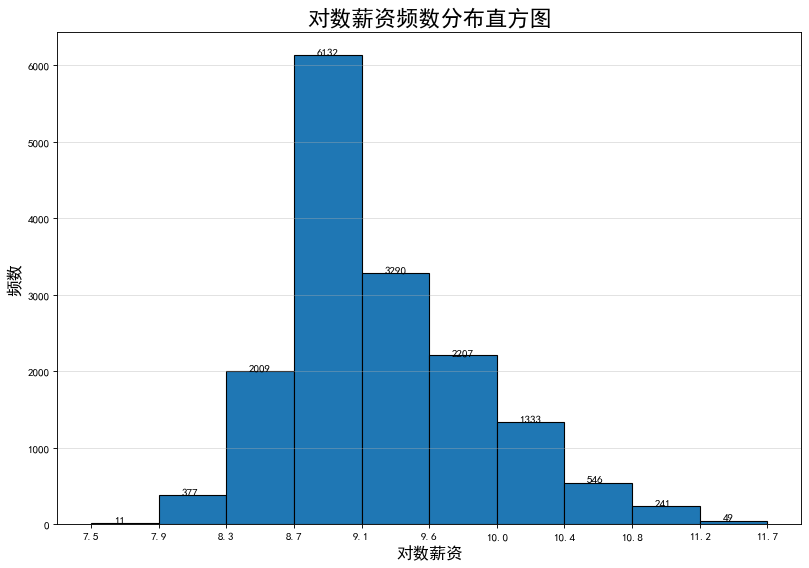

In [6]:
def plothist(data,bins,xlabel):
    """
    根据数据画频数直方图
    """
    title = xlabel + '频数分布直方图'
    plt.figure(figsize=(12,8),dpi=80)
    nums,bins,patches = plt.hist(list(data),bins=bins,edgecolor='k')
    plt.xticks(bins,np.around(bins, decimals=1),size=10)
    offset = (bins[1]-bins[0])/3
    for num,bin in zip(nums,bins):
        plt.annotate(int(num),xy=(bin+offset,num+3),xytext=(bin+offset,num+3))
    # 绘制具体数字
    plt.xlabel(xlabel, fontproperties=my_font,size = 15)
    plt.ylabel('频数', fontproperties=my_font,size = 15)
    plt.title(title,size=20, fontproperties=my_font)
    plt.grid(alpha=0.4,axis="y")
    plt.show()

bins = 10
xlabel = '对数薪资'
plothist(data ["lnsalary"],bins,xlabel)

首先，总体上来说，薪资取了对数后非常接近，方差很小。  
我这里列出一些对应关系，最小值7.46，变化前是1750；最大值是11.6，变化前是115000。  
大多数对数薪资集中在8.3-10中，里面含有总数据的85%。  
其中8.7-9.1内的数据占据了总数据的40%，9.1-9.6占据20%。  
给出一些对应关系：8.3对应4000，8.7对应6000，9.1对应9000，9.6对应15000，10对应22000。



#### 4. 绘制不同公司属性(nature)下，对数薪资(lnsalary)箱线图，并进行简要解读


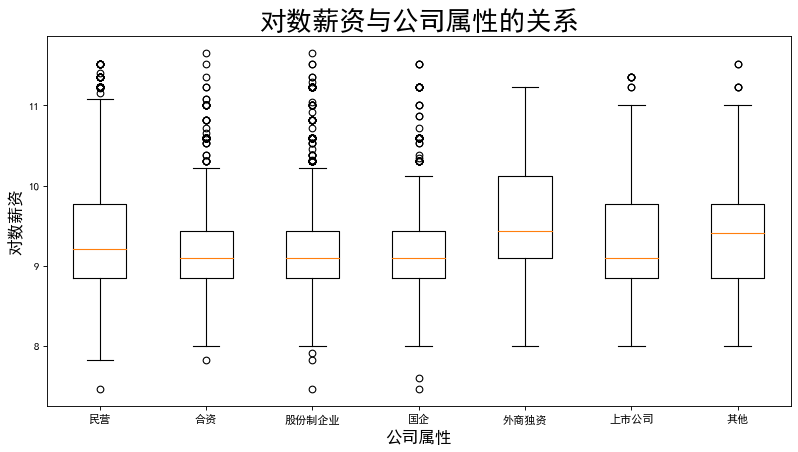

In [7]:
nature_labels = data['nature'].unique()
x = []
for label in nature_labels:
    x.append(data[data['nature'] == label]["lnsalary"])
plt.figure(figsize=(12,6),dpi=80)    
plt.boxplot(x,labels=nature_labels)
plt.ylabel('对数薪资', fontproperties=my_font,size = 15)
plt.xlabel('公司属性', fontproperties=my_font,size = 15)
plt.title('对数薪资与公司属性的关系',fontproperties=my_font)
plt.show()

这里是描述对数薪资与公司属性的关系的箱线图。  
我们可以看到，首先总体上各个类别的公司的平均收入并没有特别夸张的差别。  
其次，相对来说外商、民营的收入会大于合资、股份制企业和国企，相应的，后几者的收入总体上更接近，方差更小。这符合我们通常对公司薪资分布的认知，即私企外商会赚更多钱，而国企的收入更平稳。


#### 5. 用所有的数据，将对数薪资(lnsalary)作为因变量，其余变量（除：公司名称、招聘岗位、岗位职责）作为自变量做线性回归来分析薪资的影响因素，观察最终的回归系数并尝试对系数进行解释。

In [8]:
linear_columns = ['nature','size','sector', 'education', 'experience']
linear_data = pd.DataFrame(data, columns=linear_columns)

for column in linear_data.columns:
    print(linear_data[column].unique())


['民营' '合资' '股份制企业' '国企' '外商独资' '上市公司' '其他']
['20-99人' '100-499人' '500-999人' '10000人以上' '20人以下' '1000-9999人']
['基金,证券,期货,投资' '银行' '信托,担保,拍卖,典当' '保险']
['不限' '大专' '硕士及以上' '本科']
['不限' '5_10年' '1_3年' '无经验' '3_5年' '1年以下' '10年以上' '1年以上' '2年以上']


将用来回归的数据取出作为新的变量linear_data。  
并查看每列可能的取值以清洗数据。

In [9]:
pd.Series(linear_data['experience']).value_counts()    

不限       8129
1_3年     3138
3_5年     2514
5_10年    1467
1年以下      407
无经验       269
10年以上     267
1年以上        3
2年以上        1
Name: experience, dtype: int64

发现experience列存在一些脏数据，我们查看下具体的数量情况。

In [10]:
# linear_data["experience"].replace('1年以下',"不限", inplace = True)
# linear_data["experience"].replace('无经验',"不限", inplace = True)
linear_data["experience"].replace('1年以上',"1_3年", inplace = True)
linear_data["experience"].replace('2年以上',"1_3年", inplace = True)

pd.Series(linear_data['experience']).value_counts() 

不限       8129
1_3年     3142
3_5年     2514
5_10年    1467
1年以下      407
无经验       269
10年以上     267
Name: experience, dtype: int64

将不应该存在的脏数据归类进合理的类别，并再次查看experience的分布情况。  
experience共有7种可能取值。

In [11]:
for column in linear_columns:
    column_list = linear_data[column].unique()
#     print(column_list)
    for item in column_list:
        linear_data[column+item] = (linear_data[column] == item).astype('int') 
linear_data = linear_data.drop(linear_columns,axis=1)
linear_data.head()

,nature民营,nature合资,nature股份制企业,nature国企,nature外商独资,nature上市公司,nature其他,size20-99人,size100-499人,size500-999人,...,education大专,education硕士及以上,education本科,experience不限,experience5_10年,experience1_3年,experience无经验,experience3_5年,experience1年以下,experience10年以上
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


由于我们所处理的变量都是多值的定性变量，因此我们将变量都转换为相应的哑变量。  
并将原本的变量删除。  
举例来说，education属性本来有['不限' '大专' '硕士及以上' '本科']四种取值，我们将之转化为相应的4个0-1变量以描述。

In [12]:
benchmark = ['nature国企','size20人以下','sector银行','education本科','experience1_3年']
linear_data = linear_data.drop(benchmark,axis=1)
linear_data['const'] = 1
linear_data.head()

,nature民营,nature合资,nature股份制企业,nature外商独资,nature上市公司,nature其他,size20-99人,size100-499人,size500-999人,size10000人以上,...,education不限,education大专,education硕士及以上,experience不限,experience5_10年,experience无经验,experience3_5年,experience1年以下,experience10年以上,const
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


将作为基准的属性删除，并添加了一个全1列以在线性回归时拟合常数项。  
如果某属性的剩余的全部哑变量都为0则表明该属性取值为基准属性。

In [13]:
import statsmodels.api as sm
X = linear_data
y = data["lnsalary"]
model = sm.OLS(y, X) # 建立 OLS 模型: Y = b0 + b1*X + ... + bm*Xm + e
results = model.fit() # 返回模型拟合结果
yFit = results.fittedvalues # 模型拟合的 y值
# print(results.summary()) # 输出回归分析的摘要
# print("\nOLS model: Y = b0 + b1*X + ... + bm*Xm")
# print('Parameters: ', results.params) # 输出：拟合模型的系数

这里我们使用statsmodels中的OLS函数来进行多元线性回归。  
下面会输出结果。

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lnsalary   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     306.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:20:15   Log-Likelihood:                -11895.
No. Observations:               16195   AIC:                         2.384e+04
Df Residuals:                   16171   BIC:                         2.402e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
nature民营              0.0863      0.015      5.796      0.000       0.057       0.115
nature合资              0.1738      0.017     10.324      0.000       0.141       0.207
nature股份制企业           0.0923      0.015      6.236      0.000       0.063       0.121
nature外商独资            0.2387      0.029      8.372      0.000       0.183       0.295
nature上市公司            0.1329      0.025      5.314      0.000       0.084       0.182
nature其他              0.0948      0.029      3.259      0.001       0.038       0.152
size20-99人           -0.0687      0.027     -2.583      0.010      -0.121      -0.017
size100-499人         -0.0607      0.026     -2.341      0.019      -0.112      -0.010
size500-999人         -0.0332      0.027     -1.221      0.222      -0.086       0.020
size10000人以上          0.1800      0.029      6.261      0.000       0.124       0.236
size1000-9999人       -0.0839      0.027     -3.088      0.002      -0.137      -0.031
sector基金,证券,期货,投资     0.0166      0.026      0.652      0.515      -0.033       0.067
sector信托,担保,拍卖,典当    -0.0879      0.033     -2.648      0.008      -0.153      -0.023
sector保险             -0.0471      0.028     -1.676      0.094      -0.102       0.008
education不限           0.0612      0.013      4.832      0.000       0.036       0.086
education大专          -0.2016      0.010    -20.021      0.000      -0.221      -0.182
education硕士及以上        0.2310      0.019     12.292      0.000       0.194       0.268
experience不限          0.0250      0.011      2.178      0.029       0.003       0.047
experience5_10年       0.8010      0.016     49.367      0.000       0.769       0.833
experience无经验        -0.1406      0.032     -4.343      0.000      -0.204      -0.077
experience3_5年        0.4009      0.014     29.349      0.000       0.374       0.428
experience1年以下        0.0642      0.027      2.385      0.017       0.011       0.117
experience10年以上       1.2520      0.032     38.626      0.000       1.188       1.315
const                 9.0894      0.037    243.443      0.000       9.016       9.163
==============================================================================
Omnibus:                     1467.123   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2720.651
Skew:                           0.627   Prob(JB):                         0.00
Kurtosis:                       4.568   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

共有24个参数，上表格中的coef即为参数取值，左侧的即为列名。  
以education为例，education的基准为本科，  
education不限的系数为0.0612，这表明不限教育程度的工作比要求为本科的工作薪水的对数平均会高0.0612。  
education大专的系数为-0.2016，这表明教育程度要求为大专的工作比要求为本科的工作薪水的对数平均会低0.2016。  
education硕士及以上的系数为0.2310，这表明教育程度要求为硕士及以上的工作比要求为本科的工作薪水的对数平均会高0.2310。  
这很符合我们认知中的教育水平越高薪水越高的观念。




#### 6. 对上面的回归模型利用 BIC 准则进行变量选择并解读结果

我没有太理解这一问到底希望我们做什么，我下面是以BIC作为指标进行逐步回归。  
由于没有找到python中较好用的逐步回归的包，这里我自己写了个函数。  
我们的数据是24维的X和一个对应的Y，  
首先我们将所有的X纳入考虑并得到一个模型，  
随后我们每一步都进行如下考虑：  
对于每一个不在模型中的X，考虑将其加入模型，得到BIC；   
考虑完所有的不在模型的X后，对于所有的新模型中BIC最小的一个模型，如果该模型优于当前模型，前将当前模型替换为该模型。  
对于每一个在模型中的X，考虑将其删除，得到BIC；   
考虑完模型中的所有的X后，对于所有的新模型中BIC最小的一个模型，如果该模型优于当前模型，前将当前模型替换为该模型。  
如果这一步进行了替换，则继续进行下一步；反之则结束循环。

这里还值得一提的是，我在这里考虑模型变量剔除/加入的时候，一开始想的是将某一属性对应的所有哑变量列为一组，一齐加入或剔除。  
后来考虑还是将所有哑变量分别单独考虑比较合适，因此实现的时候是分开单独考虑的。

In [15]:
def stepwise(X,y,included, verbose = True):
    '''
    X为所有可能的自变量构成的DataFrame,
    y为响应变量
    '''
    included = list(included)
    while True:
        changed=False
        excluded=list(set(X.columns)-set(included))
        if included: 
            model=sm.OLS(y,X[included]).fit()
            now_BIC = model.bic
        else:
            now_BIC = float('inf')
        
        #forward step 考虑是否需要将某列加入模型
        ex_BIC_val=pd.Series(index=excluded,dtype='float64')
        for new_column in excluded:
            model=sm.OLS(y,X[included+[new_column]]).fit()
            ex_BIC_val[new_column] = model.bic
            if  verbose :
                print('       ','add',new_column,model.bic)
        min_BIC=ex_BIC_val.min()
        if min_BIC < now_BIC:
            changed=True
            add_feature=ex_BIC_val.idxmin()
            included.append(add_feature)
            print("Add {:20} with BIC_value   {:.6}".format(add_feature,min_BIC))
            
        model=sm.OLS(y,X[included]).fit()
        now_BIC = model.bic   
        #backward step 考虑是否要将某列剔除模型
        if len(included) > 1:
            in_BIC_val=pd.Series(index=included,dtype='float64')
            for drop_column in included:
                model=sm.OLS(y,X[list(set(included)-set([drop_column]))]).fit()
                in_BIC_val[drop_column] = model.bic
                if  verbose :
                    print('      ','drop',drop_column,model.bic)
            min_BIC=in_BIC_val.min()
            if min_BIC < now_BIC:
                changed=True
                drop_feature=in_BIC_val.idxmin()
                included.remove(drop_feature)
                print("Drop {:20} with BIC_value   {:.6}".format(drop_feature,min_BIC))
            
        if not changed:
            break
    return included

In [16]:
best = stepwise(linear_data,y,included=linear_data.columns,verbose = False)
# best2 = stepwise(linear_data,y,included=[])
print(best)

Drop sector基金,证券,期货,投资    with BIC_value   24013.5
Drop size500-999人         with BIC_value   24005.3
Drop experience不限         with BIC_value   24000.5
Drop experience1年以下       with BIC_value   23994.4
Drop size100-499人         with BIC_value   23993.3
Drop size20-99人           with BIC_value   23986.9
Drop size1000-9999人       with BIC_value   23983.6
['nature民营', 'nature合资', 'nature股份制企业', 'nature外商独资', 'nature上市公司', 'nature其他', 'size10000人以上', 'sector信托,担保,拍卖,典当', 'sector保险', 'education不限', 'education大专', 'education硕士及以上', 'experience5_10年', 'experience无经验', 'experience3_5年', 'experience10年以上', 'const']


这里打印出了每一步变量的增改，下面是最后停止时要选取的17个变量。   
这里只进行了7次drop操作而没有进行add，据我观察应该是正确的，  
可以把参数verbose改为True输出更具体的日志，但是考虑篇幅排版这里不加展示。  
  
我上面注释了best2的获取代码，是从另一方向进行stepwise后的结果。值得指出的是两个方向最后选择的属性不太一样。

In [17]:
model = sm.OLS(y, X[best]) # 建立 OLS 模型: Y = b0 + b1*X + ... + bm*Xm + e
results = model.fit() # 返回模型拟合结果
yFit = results.fittedvalues # 模型拟合的 y值
#print(results.summary()) # 输出回归分析的摘要
# print("\nOLS model: Y = b0 + b1*X + ... + bm*Xm")
# print('Parameters: ', results.params) # 输出：拟合模型的系数

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lnsalary   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     438.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:20:17   Log-Likelihood:                -11909.
No. Observations:               16195   AIC:                         2.385e+04
Df Residuals:                   16178   BIC:                         2.398e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
nature民营              0.0796      0.015      5.407      0.000       0.051       0.108
nature合资              0.1799      0.016     10.975      0.000       0.148       0.212
nature股份制企业           0.0905      0.015      6.166      0.000       0.062       0.119
nature外商独资            0.2268      0.028      8.005      0.000       0.171       0.282
nature上市公司            0.1247      0.025      5.046      0.000       0.076       0.173
nature其他              0.0902      0.029      3.124      0.002       0.034       0.147
size10000人以上          0.2446      0.015     16.813      0.000       0.216       0.273
sector信托,担保,拍卖,典当    -0.1023      0.022     -4.689      0.000      -0.145      -0.060
sector保险             -0.0721      0.014     -5.012      0.000      -0.100      -0.044
education不限           0.0699      0.012      5.883      0.000       0.047       0.093
education大专          -0.1966      0.010    -19.825      0.000      -0.216      -0.177
education硕士及以上        0.2320      0.019     12.386      0.000       0.195       0.269
experience5_10年       0.7847      0.015     52.930      0.000       0.756       0.814
experience无经验        -0.1561      0.031     -4.974      0.000      -0.218      -0.095
experience3_5年        0.3840      0.012     32.387      0.000       0.361       0.407
experience10年以上       1.2389      0.032     39.139      0.000       1.177       1.301
const                 9.0644      0.014    627.249      0.000       9.036       9.093
==============================================================================
Omnibus:                     1471.072   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2728.459
Skew:                           0.628   Prob(JB):                         0.00
Kurtosis:                       4.570   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

这是用筛选后的17个变量建立的多元线性回归模型。  
可以发现相较于上面的模型结果，这里模型的每一个参数的p值都相当小，说明模型得到了一定的改进。


#### 7. 对 BIC 选择后的模型用所有的数据进行五折交叉验证，评估模型结果，并进行解读

In [19]:
from sklearn.model_selection import KFold
from math import sqrt

X_best = X[best]
kf = KFold(n_splits=5,shuffle=False)  # 初始化KFold
i = 1
for train_index , test_index in kf.split(X_best):  # 调用split方法切分数据
    # print('train_index:%s , test_index: %s ' %(train_index,test_index))
    
    train_data = X_best.loc[train_index]
    train_y = y.loc[train_index]
    test_data = X_best.loc[test_index]
    test_y = y.loc[test_index]
    model = sm.OLS(train_y, train_data) # 建立 OLS 模型: Y = b0 + b1*X + ... + bm*Xm + e
    results = model.fit() # 返回模型拟合结果
    # results.summary()
    pred_y = results.predict(test_data)
    print('第{}组'.format(i))
    i += 1
    mse = np.sum((test_y - pred_y) ** 2) / len(test_y)
    rmse = sqrt(mse)
    mae = np.sum(np.absolute(test_y - pred_y)) / len(test_y)
    r2 = 1-mse/ np.var(test_y)#均方误差/方差
    print(" mae:",round(mae,4),"mse:",round(mse,4)," rmse:",round(rmse,4)," r2:",round(r2,4))

第1组
 mae: 0.3974 mse: 0.27  rmse: 0.5196  r2: 0.3268
第2组
 mae: 0.3694 mse: 0.2306  rmse: 0.4802  r2: 0.1952
第3组
 mae: 0.3786 mse: 0.2444  rmse: 0.4944  r2: 0.3024
第4组
 mae: 0.4106 mse: 0.2843  rmse: 0.5332  r2: 0.2914
第5组
 mae: 0.3823 mse: 0.2597  rmse: 0.5096  r2: 0.3103


这里交叉验证时数据的划分用了sklearn.model_selection中的KFold函数。  
对于每一个模型，我们给出4个指标来展现模型预测的效果，从前三个指标可以看出我们的预测误差并不大。   
这里的决定系数$R^2$的值并不是很大，我认为原因是因为数据总体的方差太小。  
模型的总体表现还是可以的。

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lnsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     345.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:20:18   Log-Likelihood:                -9501.9
No. Observations:               12956   AIC:                         1.904e+04
Df Residuals:                   12939   BIC:                         1.916e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
nature民营              0.0843      0.016      5.264      0.000       0.053       0.116
nature合资              0.1896      0.018     10.421      0.000       0.154       0.225
nature股份制企业           0.1082      0.016      6.772      0.000       0.077       0.139
nature外商独资            0.2503      0.031      8.049      0.000       0.189       0.311
nature上市公司            0.1567      0.027      5.750      0.000       0.103       0.210
nature其他              0.1087      0.031      3.475      0.001       0.047       0.170
size10000人以上          0.2456      0.016     15.585      0.000       0.215       0.277
sector信托,担保,拍卖,典当    -0.1127      0.025     -4.537      0.000      -0.161      -0.064
sector保险             -0.0587      0.015     -3.837      0.000      -0.089      -0.029
education不限           0.0747      0.013      5.630      0.000       0.049       0.101
education大专          -0.1910      0.011    -17.248      0.000      -0.213      -0.169
education硕士及以上        0.2382      0.021     11.557      0.000       0.198       0.279
experience5_10年       0.7799      0.017     46.954      0.000       0.747       0.812
experience无经验        -0.1481      0.036     -4.085      0.000      -0.219      -0.077
experience3_5年        0.3888      0.013     29.450      0.000       0.363       0.415
experience10年以上       1.2501      0.036     34.815      0.000       1.180       1.321
const                 9.0413      0.016    571.579      0.000       9.010       9.072
==============================================================================
Omnibus:                     1142.458   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2125.058
Skew:                           0.612   Prob(JB):                         0.00
Kurtosis:                       4.562   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

最后给出一个最终的模型。